#KMeans Clustering

It is a division of datapoints in cluster such that each data point is present in only one cluster.

#Problem Statement
To analyze the type of customers in the market based on the features

In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.style.use('ggplot')

In [2]:
#load data
data = pd.read_csv('datasets/Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


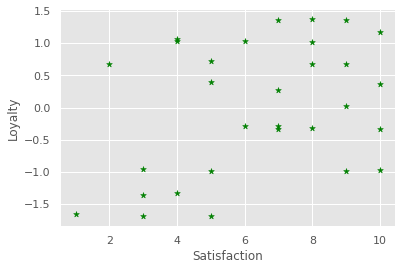

In [3]:
#visualization of data using scatter plot
plt.scatter(data['Satisfaction'],data['Loyalty'], color='green', marker='*')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()


In [4]:
X = data.copy()

In [5]:
#clustering and model fitting
from sklearn.cluster import KMeans

k = KMeans(2)
k.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#copy results
clusters = X.copy()
clusters['ClusterPred'] = k.fit_predict(X)

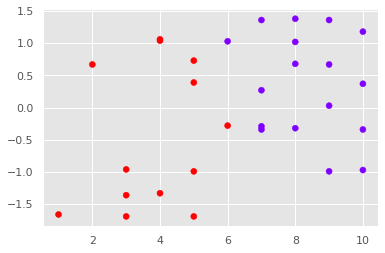

In [7]:
#plot clusters
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'], c = clusters['ClusterPred'],cmap='rainbow')
plt.show()

In [8]:
from sklearn import preprocessing

x_scale = preprocessing.scale(X)
x_scale

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [9]:
#elbow method
WCSS = []
for i in range(1,30):
  k = KMeans(i)
  k.fit(x_scale)
  WCSS.append(k.inertia_)

WCSS

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.571285077136385,
 5.326631124753926,
 4.337110750237059,
 3.8231980448085188,
 3.250314461222201,
 2.8561413790226697,
 2.4498243855912456,
 2.2293147798337243,
 1.8254643231217114,
 1.5794290413892373,
 1.3467143681045315,
 1.1570349873539385,
 0.9716636175522552,
 0.8368200723257393,
 0.6366791702988839,
 0.5362608768873279,
 0.4239312504600062,
 0.3227119817275011,
 0.24721053307798668,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

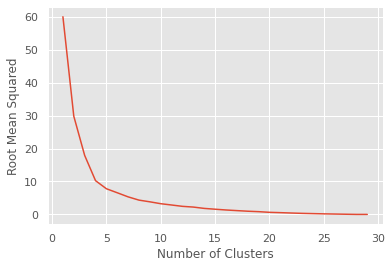

In [10]:
#visualization of elbow method
plt.plot(range(1,30),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('Root Mean Squared')
plt.show()

In [11]:
k_new = KMeans(4)
k_new.fit(x_scale)

clusters_new = X.copy()

clusters_new['ClusterPred'] = k_new.fit_predict(x_scale)
clusters_new

,Satisfaction,Loyalty,ClusterPred
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,0
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,1
9,8,0.68,1


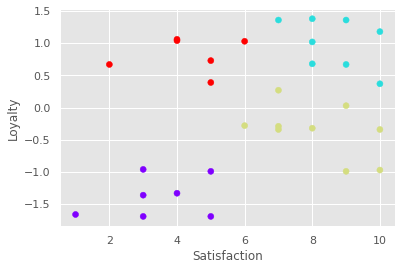

In [12]:
#Visualization of 4 clusters
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['ClusterPred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

###Analysis

1. **Purple Churn**: Low Satisfaction, Less Loyalty
2. **Blue Churn**: High Satisfaction, Neutral Loyalty
3. **Red Churn**: Low Satisfaction, High Loyalty
4. **Yellow Churn**: High Satisfaction, High Loyalty